# Quantum Computer lab 1 (SOLUTIONS)

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* This notebook introduces some of the basic quantum circuit functionality in the pennylane module
* Please run the code to make sure it works, then try the questions.

There is documentation about pennylane at https://pennylane.ai/

##  Goals of the lab

* Simulate quantum circuits using pennylane
* Navigate the pennylane documentation to solve problems
*  Install and run the pennylane modules

In later labs we will investigate introducing using pennylane to solve bigger problems.

## Exercises on the pennylane system

To get started we will work with the online pennylane system

* Please create an account on the pennylane https://pennylane.ai/ Use the **sign in** button at the top right hand side of the screen to create an account



The Pennylane system has a series of exercises that can be run on their web system. You can run the results and check that the correct answer is obtained.

From https://pennylane.ai/codebook/02-single-qubit-gates/01-x-and-h
* work through 1.4.1
* work through 1.4.2
* work through 1.4.3

Learning Objectives:

* Explain why we can understand how an operation works by applying it to the basis states.
* Describe the action of the X gate, its matrix representation, and eigenvalues.
* Describe the action of the Hadamard gate, its matrix representation, and eigenvalues.

From https://pennylane.ai/codebook/01-introduction-to-quantum-computing/02-quantum-circuits
* work through 1.2.1


##  Installing pennylane on the University machines and your laptop

There are instructions on how to install pennylane on your computer at: https://pennylane.ai/install/

In the annaconda prompt or terminal on a Mac type 

pip install pennylane --upgrade

If you have spyder running you may need to restart spyder to access the library.

You will have to run this command everytime you work on a new PC in the lab.

There may be  additional complications with the University PCs,because of administrative rights. 


## Running a pennylane circuit on your laptop

The code below creates a circuit and does 1024 measurements on it


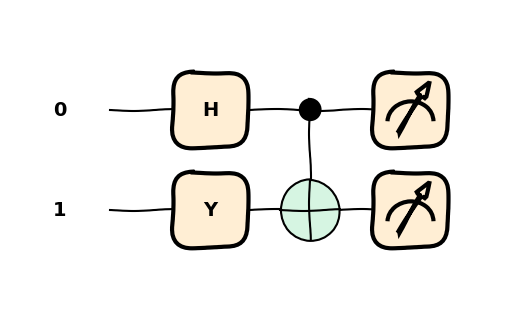

In [3]:
import pennylane as qml
import matplotlib.pyplot as plt
import sys

dev = qml.device("default.qubit", shots=1024)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliY(wires=1)
    qml.CNOT(wires=[0, 1])
    
    return qml.counts(wires=[0, 1])

qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()


The code below creates a histogram from the measurements

{'01': tensor(537, requires_grad=True), '10': tensor(487, requires_grad=True)}


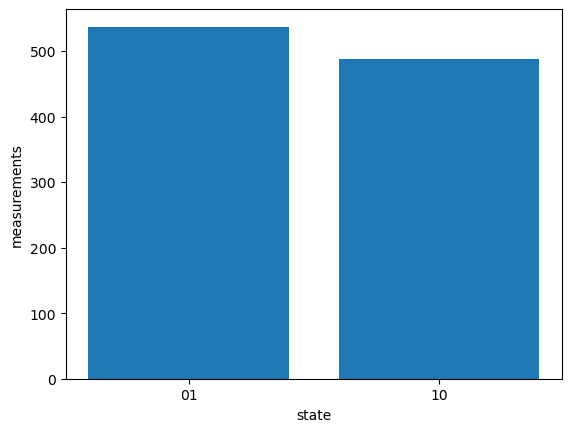

In [4]:
ans = circuit()
print(ans)

#sys.exit(0)

state = []
res = [] 
for state_ in ans :
    state.append(str(state_))
    res.append(int(ans[state_]))

plt.bar(state, res)
plt.xlabel("state")
plt.ylabel("measurements")

plt.show()


### Question 2

* Use the theory of quantum circuits to explain the above histogram. The input to the circuit is |0>

#### solution

CNOT_01 $H_0$  $Y_1$ | 00> =

CNOT_01 $H_0$ i | 01 > 

CNOT_01 $\frac{i}{\sqrt{2}}$ ( | 01> + |11>

 $\frac{i}{\sqrt{2}}$ ( | 01> + |10>

So when the state is measured the state |01> is found 50% of the time and |10> is found 50% of the time. This is consistent with the histogram




###  Question 3 on the one qubit circuit

 <img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/2circuit.png?raw=true" alt="1qubit circuit"> 

* Modify the code above to implement the above quantum circuit (that was used in lectures)
* Do the measurements correspond to the theoretical result for the input $\mid 0 \rangle$
* Run the circuit for 512, 1024, 2048 shots. Do you notice any patterns?


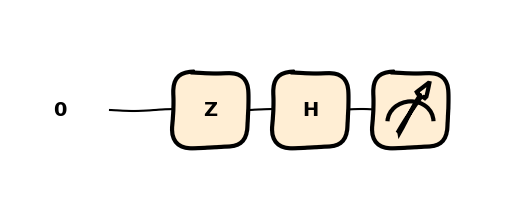

In [5]:

### solution

import pennylane as qml
import matplotlib.pyplot as plt
import sys

dev = qml.device("default.qubit", shots=1024)

@qml.qnode(dev)
def circuit():
    qml.PauliZ(wires=0)
    qml.Hadamard(wires=0)    
    return qml.counts(wires=[0] )

qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()


{'0': tensor(504, requires_grad=True), '1': tensor(520, requires_grad=True)}


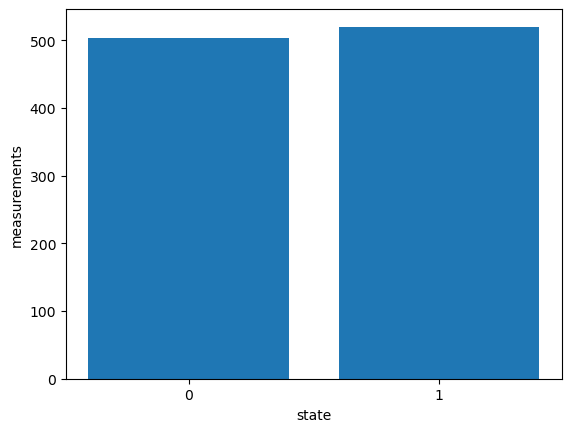

In [6]:
ans = circuit()
print(ans)

#sys.exit(0)

state = []
res = [] 
for state_ in ans :
    state.append(str(state_))
    res.append(int(ans[state_]))

plt.bar(state, res)
plt.xlabel("state")
plt.ylabel("measurements")

plt.show()

Theory

H Z | 0 > =

H | 0 >

$\frac{1}{\sqrt{2}}$ ( |0> + |1> )

Consistent with the histogram results.

As the number of shots increases the measurements in |0> and |1> should become more equal.


## Question 4

 <img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/InitCircuit.png?raw=true" alt="2 qubit circuit"> 
 
 * Modify the above code to implement this circuit that was shown in lectures (and the diagram above)
 * Assume an input state of $\mid 00 >$ apply the above quantum circuit and find the output state.
 * Does the numerical result agree with the theoretical result

* Run the code for the cases: 00, 01, 10, 11
* Check that the circuit works. If it does not work, modify the code

The default for Pennylane is to use |0> states as input to the circuit.

To input a |1> apply an X operator to the input wire of the circuit.


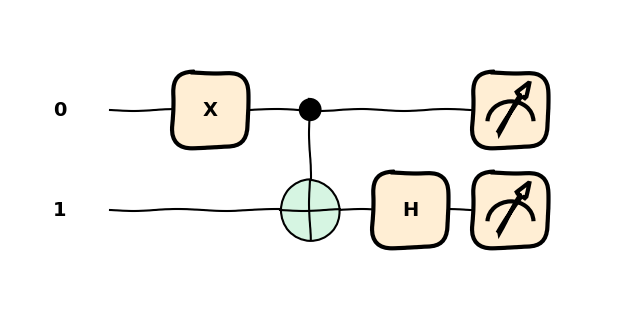

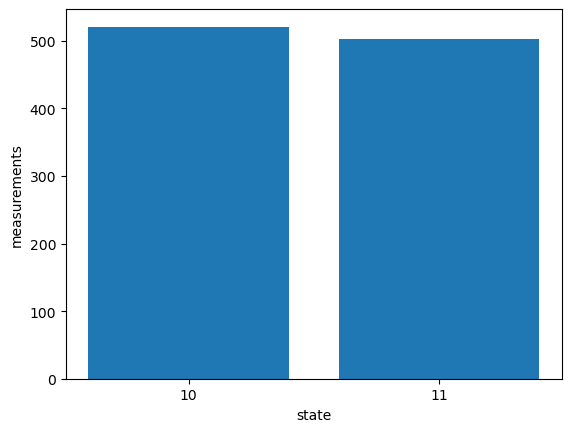

In [9]:
## solution 00

import pennylane as qml
import matplotlib.pyplot as plt
import sys

dev = qml.device("default.qubit", shots=1024)

@qml.qnode(dev)
def circuit():

    #  circuit
    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)
    
    return qml.counts(wires=[0, 1])

qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()

## Create the histogram
ans = circuit()

state = []
res = [] 
for state_ in ans :
    state.append(str(state_))
    res.append(int(ans[state_]))

plt.bar(state, res)
plt.xlabel("state")
plt.ylabel("measurements")

plt.show()



### theory

$H_1$ CNOT_01 $X_0$ |00> =

$H_1$ CNOT_01  |10> 

$H_1$  |11>

1/(sqrt(2)) (  |11> - |10> ) 

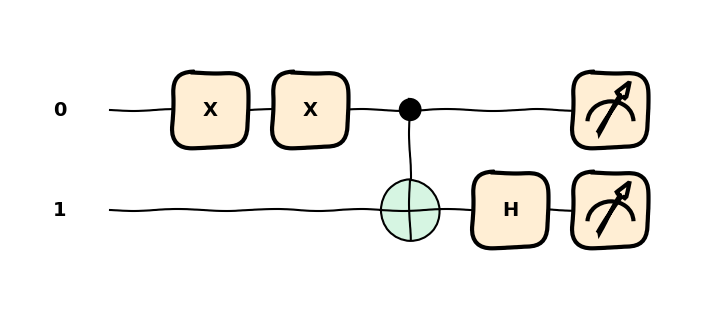

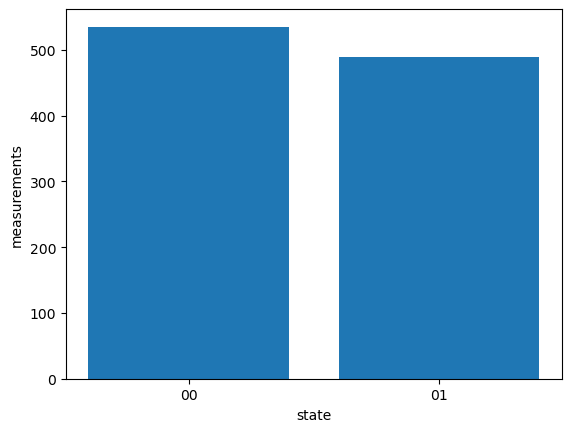

In [10]:
## solution 10

import pennylane as qml
import matplotlib.pyplot as plt
import sys

dev = qml.device("default.qubit", shots=1024)

@qml.qnode(dev)
def circuit():
    # flip the input on wire 0 to X
    qml.PauliX(wires=0)
    
    #  circuit
    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)
    
    return qml.counts(wires=[0, 1])

qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()

## Create the histogram
ans = circuit()

state = []
res = [] 
for state_ in ans :
    state.append(str(state_))
    res.append(int(ans[state_]))

plt.bar(state, res)
plt.xlabel("state")
plt.ylabel("measurements")

plt.show()



### theory input |10>

Note $X^2$ = 1

$H_1$ CNOT_01 $X_0$ $X_0$ |00> =

$H_1$ CNOT_01  |00> 

$H_1$  |00>

1/(sqrt(2)) (  |00> + |01> ) 